# 序列的表示方法

In [67]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

In [5]:
x=tf.range(6)
print("原始的x为:", x)
x_new=tf.random.shuffle(x)
print("打乱顺序后的x为:", x_new)

原始的x为: tf.Tensor([0 1 2 3 4 5], shape=(6,), dtype=int32)
打乱顺序后的x为: tf.Tensor([0 3 5 1 4 2], shape=(6,), dtype=int32)


In [27]:
net = layers.Embedding(10, 4)

In [28]:
# 这里未进行过嵌入计算所以查看属性时会报错：
net.embeddings

AttributeError: 'Embedding' object has no attribute 'embeddings'

In [29]:
out = net(x)
out.shape

TensorShape([6, 4])

In [30]:
net.embeddings.trainable

True

In [32]:
# 经过计算后，网络进行了初始化，生成了10个单词，每一个单词4维的嵌入表示，
# 注意，这里x只有6个数据，但是嵌入层的表示有10个单词。
net.embeddings

<tf.Variable 'embedding_3/embeddings:0' shape=(10, 4) dtype=float32, numpy=
array([[-0.02187785, -0.00677528, -0.02791535, -0.02423965],
       [ 0.03068382, -0.00337893,  0.04433299,  0.04109489],
       [-0.03271063, -0.00235771,  0.01263262, -0.02691369],
       [ 0.0208908 , -0.04512967,  0.01509284,  0.04125253],
       [-0.01142089,  0.0230948 ,  0.0236928 , -0.01944438],
       [ 0.02946445, -0.02851324,  0.01149063, -0.04480273],
       [-0.00597415,  0.01308123,  0.03498724,  0.01676054],
       [-0.03161579, -0.03993338, -0.00774516,  0.00422759],
       [ 0.03124628, -0.04395057, -0.0307188 ,  0.00938842],
       [-0.02727023,  0.03445312, -0.02206357, -0.03729154]],
      dtype=float32)>

In [33]:
embed_glove = load_embed('glove.6B.50d.txt')

NameError: name 'load_embed' is not defined

In [35]:
cell = layers.SimpleRNNCell(3)
cell.build(input_shape=(None,4))

In [37]:
cell.trainable_variables

[<tf.Variable 'kernel:0' shape=(4, 3) dtype=float32, numpy=
 array([[-0.55899704,  0.04168248,  0.4960773 ],
        [-0.66414547,  0.86173284,  0.7056141 ],
        [-0.50976145,  0.25054467, -0.8122277 ],
        [-0.61425304, -0.8666443 ,  0.38182127]], dtype=float32)>,
 <tf.Variable 'recurrent_kernel:0' shape=(3, 3) dtype=float32, numpy=
 array([[-0.73585975, -0.00368365,  0.67712396],
        [ 0.590789  ,  0.4851416 ,  0.64467496],
        [-0.33087584,  0.87442774, -0.35482   ]], dtype=float32)>,
 <tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

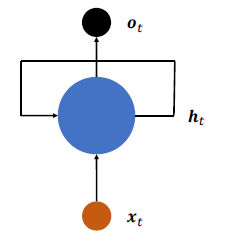

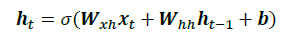

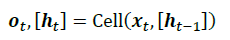

In [38]:
# 初始化状态向量，用列表包裹，统一格式
h0 = [tf.zeros([4, 64])]
x = tf.random.normal([4, 80, 100]) # 生成输入张量，4 个80 单词的句子
xt = x[:,0,:] # 所有句子的第1 个单词

In [39]:
# 构建输入特征n=100,序列长度s=80,状态长度=64 的Cell
cell = layers.SimpleRNNCell(64)
out, h1 = cell(xt, h0) # 前向计算
print(out.shape, h1[0].shape)

(4, 64) (4, 64)


In [40]:
print(id(out), id(h1[0]))

2089798160000 2089798160000


In [41]:
h = h0 # h 保存每个时间戳上的状态向量列表
# 在序列长度的维度解开输入，得到xt:[b,n]
for xt in tf.unstack(x, axis=1):
    out, h = cell(xt, h) # 前向计算,out 和h 均被覆盖
# 最终输出可以聚合每个时间戳上的输出，也可以只取最后时间戳的输出
out = out

In [43]:
out.shape

TensorShape([4, 64])

## 多层SimpleRNNCell 网络

In [45]:
x = tf.random.normal([4,80,100])
xt = x[:,0,:] # 取第一个时间戳的输入x0
# 构建2 个Cell,先cell0,后cell1，内存状态向量长度都为64
cell0 = layers.SimpleRNNCell(64)
cell1 = layers.SimpleRNNCell(64)
h0 = [tf.zeros([4,64])] # cell0 的初始状态向量
h1 = [tf.zeros([4,64])] # cell1 的初始状态向量

In [46]:
for xt in tf.unstack(x, axis=1):
    # xt 作为输入，输出为out0
    out0, h0 = cell0(xt, h0)
    # 上一个cell 的输出out0 作为本cell 的输入
    out1, h1 = cell1(out0, h1)

In [47]:
# 保存上一层的所有时间戳上面的输出
middle_sequences = []

In [48]:
# 计算第一层的所有时间戳上的输出，并保存
for xt in tf.unstack(x, axis=1):
    out0, h0 = cell0(xt, h0)
    middle_sequences.append(out0)

In [49]:
# 如果不是末层，需要保存所有时间戳上面的输出
for xt in middle_sequences:
    out1, h1 = cell1(xt, h1)

In [59]:
print(out1.shape)
len(h1)

(4, 64)


1

In [63]:
layer = layers.SimpleRNN(64) # 创建状态向量长度为64 的SimpleRNN 层
x = tf.random.normal([4, 80, 100])
out = layer(x) # 和普通卷积网络一样，一行代码即可获得输出
out.shape

TensorShape([4, 64])

In [65]:
# 创建RNN 层时，设置返回所有时间戳上的输出
layer = layers.SimpleRNN(64,return_sequences=True)
out = layer(x) # 前向计算
out.shape # 输出，自动进行了concat 操作

TensorShape([4, 80, 64])

In [68]:

net = keras.Sequential([ # 构建2 层RNN 网络
# 除最末层外，都需要返回所有时间戳的输出，用作下一层的输入
layers.SimpleRNN(64, return_sequences=True),
layers.SimpleRNN(64),
])
out = net(x) # 前向计算

# 情感分析问题实战

In [82]:
batchsz = 128 # 批量大小
total_words = 10000 # 词汇表大小N_vocab
max_review_len = 80 # 句子最大长度s，大于的句子部分将截断，小于的将填充
embedding_len = 100 # 词向量特征长度n
# 加载IMDB 数据集，此处的数据采用数字编码，一个数字代表一个单词
(x_train, y_train), (x_test, y_test) =keras.datasets.imdb.load_data(num_words=total_words)
# 打印输入的形状，标签的形状
print(x_train.shape, len(x_train[0]), y_train.shape)
print(x_test.shape, len(x_test[0]), y_test.shape)

(25000,) 218 (25000,)
(25000,) 68 (25000,)


In [83]:
# 数字编码表
word_index = keras.datasets.imdb.get_word_index()

1641221/1641221 [==============================] - 2s 1us/step


In [96]:
top =10
import random
a = random.sample(word_index.keys(), 10)
b = [word_index[v] for v in a]
_ = [print(k,":",v) for k, v in zip(a, b)]

'drum : 71924
sold : 2959
olivier : 4742
karmas : 86256
theathre : 71029
cactuses : 60062
wouldn't' : 71320
loonatics : 32751
lachman : 81551
untrumpeted : 81672


C:\Users\qingyun891liu\AppData\Local\Temp\ipykernel_29864\1361313338.py:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  a = random.sample(word_index.keys(), 10)


In [98]:
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0 # 填充标志
word_index["<START>"] = 1 # 起始标志
word_index["<UNK>"] = 2 # 未知单词的标志
word_index["<UNUSED>"] = 3

In [99]:
#构建从ID 转换为相应单词的方法
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
decode_review(x_train[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [101]:
# 截断和填充句子，使得等长，此处长句子保留句子后面的部分，短句子在前面填充
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_review_len)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_review_len)

In [102]:
# 构建数据集，打散，批量，并丢掉最后一个不够batchsz 的batch
db_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
db_train = db_train.shuffle(1000).batch(batchsz, drop_remainder=True)
db_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))
db_test = db_test.batch(batchsz, drop_remainder=True)

In [103]:
# 统计数据集属性
print('x_train shape:', x_train.shape, tf.reduce_max(y_train),
tf.reduce_min(y_train))
print('x_test shape:', x_test.shape)

x_train shape: (25000, 80) tf.Tensor(1, shape=(), dtype=int64) tf.Tensor(0, shape=(), dtype=int64)
x_test shape: (25000, 80)


In [ ]:
## 基础模型一

In [125]:
batchsz = 128 # 批量大小
total_words = 10000 # 词汇表大小N_vocab
max_review_len = 80 # 句子最大长度s，大于的句子部分将截断，小于的将填充
embedding_len = 100 # 词向量特征长度n
from tensorflow.keras import layers, losses, optimizers, Model
class MyRNN(Model):
    # Cell 方式构建多层网络
    def __init__(self, units):
        super(MyRNN, self).__init__()
        # [b, 64]，构建Cell 初始化状态向量，重复使用
        self.state0 = [tf.zeros([batchsz, units])]  # 128,64
        self.state1 = [tf.zeros([batchsz, units])]  # 128,64
        # 词向量编码 [b, 80] => [b, 80, 100]
        self.embedding = layers.Embedding(total_words, embedding_len, input_length=max_review_len)
        # 构建2 个Cell，使用dropout 技术防止过拟合
        self.rnn_cell0 = layers.SimpleRNNCell(units)# , dropout=0.5)
        self.rnn_cell1 = layers.SimpleRNNCell(units)#, dropout=0.5)
        # 构建分类网络，用于将CELL 的输出特征进行分类，2 分类
        # [b, 80, 100] => [b, 64] => [b, 1]
        self.outlayer = layers.Dense(1)

    def call(self, inputs, training=None):
        x = inputs  # [128, 80]
        # 获取词向量: [128, 80] => [128, 80, 100]
        x = self.embedding(x)
        # 通过2 个RNN CELL,[128, 80, 100] => [128, 64]
        state0 = self.state0
        state1 = self.state1
        for word in tf.unstack(x, axis=1):  # word: [128, 100]
            out0, state0 = self.rnn_cell0(word, state0, training)
            out1, state1 = self.rnn_cell1(out0, state1, training)

        # 末层最后一个输出作为分类网络的输入: [128, 64] => [128, 1]
        x = self.outlayer(out1)
        # 通过激活函数，p(y is pos|x)
        prob = tf.sigmoid(x)
        return prob


In [122]:
def main():
    units = 64  # RNN 状态向量长度n
    epochs = 20  # 训练epochs
    model = MyRNN(units)  # 创建模型
    # 装配
    model.compile(optimizer=optimizers.Adam(0.001),
                  loss=losses.BinaryCrossentropy(), metrics=['accuracy'],
                  experimental_run_tf_function=False)
    # 训练和验证
    model.fit(db_train, epochs=epochs, validation_data=db_test)
    # 测试
    scores = model.evaluate(db_test)
    print("Final test loss and accuracy :", scores)

In [126]:
if __name__ == '__main__':
    main()

Epoch 1/20
195/195 [==============================] - 23s 94ms/step - loss: 0.4805 - accuracy: 0.7595 - val_loss: 0.3962 - val_accuracy: 0.8298
Epoch 2/20
195/195 [==============================] - 16s 83ms/step - loss: 0.2773 - accuracy: 0.8844 - val_loss: 0.3996 - val_accuracy: 0.8275
Epoch 3/20
195/195 [==============================] - 16s 83ms/step - loss: 0.1329 - accuracy: 0.9523 - val_loss: 0.5620 - val_accuracy: 0.8101
Epoch 4/20
195/195 [==============================] - 16s 85ms/step - loss: 0.0689 - accuracy: 0.9744 - val_loss: 0.7252 - val_accuracy: 0.8113
Epoch 5/20
195/195 [==============================] - 16s 84ms/step - loss: 0.0399 - accuracy: 0.9857 - val_loss: 0.8104 - val_accuracy: 0.7970
Epoch 6/20
195/195 [==============================] - 17s 85ms/step - loss: 0.0280 - accuracy: 0.9906 - val_loss: 0.9270 - val_accuracy: 0.8015
Epoch 7/20
195/195 [==============================] - 18s 92ms/step - loss: 0.0240 - accuracy: 0.9919 - val_loss: 0.9430 - val_accuracy:

## 加入预训练模型后

In [142]:
embeddings_index = {} # 提取单词及其向量，保存在字典中
GLOVE_path = r'glove.6B.50d.txt'
import numpy as np
with open(GLOVE_path,encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    print('Found %s word vectors.' % len(embeddings_index))


embedding_len = 50
num_words = min(total_words, len(word_index))
embedding_matrix = np.zeros((num_words, embedding_len)) #词向量表
for word, i in word_index.items():
    if i >= num_words:
        continue # 过滤掉其他词汇
    embedding_vector = embeddings_index.get(word) # 从GloVe 查询词向量
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector # 写入对应位置
print(embedding_matrix.shape)


(10000, 50)


In [144]:
batchsz = 128 # 批量大小
total_words = 10000 # 词汇表大小N_vocab
max_review_len = 80 # 句子最大长度s，大于的句子部分将截断，小于的将填充
embedding_len = 50 # 词向量特征长度n
from tensorflow.keras import layers, losses, optimizers, Model
class MyRNN(Model):
    # Cell 方式构建多层网络
    def __init__(self, units):
        super(MyRNN, self).__init__()
        # [b, 64]，构建Cell 初始化状态向量，重复使用
        self.state0 = [tf.zeros([batchsz, units])]  # 128,64
        self.state1 = [tf.zeros([batchsz, units])]  # 128,64
        # 词向量编码 [b, 80] => [b, 80, 100]
        self.embedding = layers.Embedding(total_words, embedding_len, input_length=max_review_len, trainable=False)#不参与梯度更新
        self.embedding.build(input_shape=(None, max_review_len))
        self.embedding.set_weights([embedding_matrix])#初始化
        # 构建2 个Cell，使用dropout 技术防止过拟合
        self.rnn_cell0 = layers.SimpleRNNCell(units)# , dropout=0.5)
        self.rnn_cell1 = layers.SimpleRNNCell(units)#, dropout=0.5)
        # 构建分类网络，用于将CELL 的输出特征进行分类，2 分类
        # [b, 80, 100] => [b, 64] => [b, 1]
        self.outlayer = layers.Dense(1)

    def call(self, inputs, training=None):
        x = inputs  # [128, 80]
        # 获取词向量: [128, 80] => [128, 80, 100]
        x = self.embedding(x)
        # 通过2 个RNN CELL,[128, 80, 100] => [128, 64]
        state0 = self.state0
        state1 = self.state1
        for word in tf.unstack(x, axis=1):  # word: [128, 100]
            out0, state0 = self.rnn_cell0(word, state0, training)
            out1, state1 = self.rnn_cell1(out0, state1, training)

        # 末层最后一个输出作为分类网络的输入: [128, 64] => [128, 1]
        x = self.outlayer(out1)
        # 通过激活函数，p(y is pos|x)
        prob = tf.sigmoid(x)
        return prob

In [148]:
def main():
    units = 64  # RNN 状态向量长度n
    epochs = 20  # 训练epochs
    model = MyRNN(units)  # 创建模型
    # 装配
    model.compile(optimizer=optimizers.Adam(0.001),
                  loss=losses.BinaryCrossentropy(), metrics=['accuracy'],
                  experimental_run_tf_function=False)
    # 训练和验证
    model.fit(db_train, epochs=epochs, validation_data=db_test)
    # 测试
    scores = model.evaluate(db_test)
    print("Final test loss and accuracy :", scores)

In [149]:
if __name__ == '__main__':
    main()

Epoch 1/20
195/195 [==============================] - 23s 94ms/step - loss: 0.6661 - accuracy: 0.5945 - val_loss: 0.6098 - val_accuracy: 0.6706
Epoch 2/20
195/195 [==============================] - 17s 87ms/step - loss: 0.6137 - accuracy: 0.6663 - val_loss: 0.6372 - val_accuracy: 0.6382
Epoch 3/20
195/195 [==============================] - 17s 88ms/step - loss: 0.5779 - accuracy: 0.7029 - val_loss: 0.5694 - val_accuracy: 0.7089
Epoch 4/20
195/195 [==============================] - 17s 88ms/step - loss: 0.5646 - accuracy: 0.7134 - val_loss: 0.5766 - val_accuracy: 0.7073
Epoch 5/20
195/195 [==============================] - 17s 87ms/step - loss: 0.5813 - accuracy: 0.6950 - val_loss: 0.5730 - val_accuracy: 0.7133
Epoch 6/20
195/195 [==============================] - 17s 89ms/step - loss: 0.5396 - accuracy: 0.7317 - val_loss: 0.5508 - val_accuracy: 0.7232
Epoch 7/20
195/195 [==============================] - 17s 89ms/step - loss: 0.5824 - accuracy: 0.6859 - val_loss: 0.6400 - val_accuracy:

In [150]:
batchsz = 128 # 批量大小
total_words = 10000 # 词汇表大小N_vocab
max_review_len = 80 # 句子最大长度s，大于的句子部分将截断，小于的将填充
embedding_len = 50 # 词向量特征长度n
from tensorflow.keras import layers, losses, optimizers, Model
class MyRNN(Model):
    # Cell 方式构建多层网络
    def __init__(self, units):
        super(MyRNN, self).__init__()
        # [b, 64]，构建Cell 初始化状态向量，重复使用
        self.state0 = [tf.zeros([batchsz, units])]  # 128,64
        self.state1 = [tf.zeros([batchsz, units])]  # 128,64
        # 词向量编码 [b, 80] => [b, 80, 100]
        self.embedding = layers.Embedding(total_words, embedding_len, input_length=max_review_len, trainable=True)#参与梯度更新
        self.embedding.build(input_shape=(None, max_review_len))
        self.embedding.set_weights([embedding_matrix])#初始化
        # 构建2 个Cell，使用dropout 技术防止过拟合
        self.rnn_cell0 = layers.SimpleRNNCell(units)# , dropout=0.5)
        self.rnn_cell1 = layers.SimpleRNNCell(units)#, dropout=0.5)
        # 构建分类网络，用于将CELL 的输出特征进行分类，2 分类
        # [b, 80, 100] => [b, 64] => [b, 1]
        self.outlayer = layers.Dense(1)

    def call(self, inputs, training=None):
        x = inputs  # [128, 80]
        # 获取词向量: [128, 80] => [128, 80, 100]
        x = self.embedding(x)
        # 通过2 个RNN CELL,[128, 80, 100] => [128, 64]
        state0 = self.state0
        state1 = self.state1
        for word in tf.unstack(x, axis=1):  # word: [128, 100]
            out0, state0 = self.rnn_cell0(word, state0, training)
            out1, state1 = self.rnn_cell1(out0, state1, training)

        # 末层最后一个输出作为分类网络的输入: [128, 64] => [128, 1]
        x = self.outlayer(out1)
        # 通过激活函数，p(y is pos|x)
        prob = tf.sigmoid(x)
        return prob

In [151]:
def main():
    units = 64  # RNN 状态向量长度n
    epochs = 20  # 训练epochs
    model = MyRNN(units)  # 创建模型
    # 装配
    model.compile(optimizer=optimizers.Adam(0.001),
                  loss=losses.BinaryCrossentropy(), metrics=['accuracy'],
                  experimental_run_tf_function=False)
    # 训练和验证
    model.fit(db_train, epochs=epochs, validation_data=db_test)
    # 测试
    scores = model.evaluate(db_test)
    print("Final test loss and accuracy :", scores)

In [152]:
if __name__ == '__main__':
    main()

Epoch 1/20
195/195 [==============================] - 23s 97ms/step - loss: 0.6306 - accuracy: 0.6384 - val_loss: 0.5746 - val_accuracy: 0.7191
Epoch 2/20
195/195 [==============================] - 17s 89ms/step - loss: 0.4861 - accuracy: 0.7729 - val_loss: 0.4967 - val_accuracy: 0.7590
Epoch 3/20
195/195 [==============================] - 17s 85ms/step - loss: 0.4285 - accuracy: 0.8085 - val_loss: 0.4517 - val_accuracy: 0.7932
Epoch 4/20
195/195 [==============================] - 18s 90ms/step - loss: 0.3593 - accuracy: 0.8508 - val_loss: 0.4496 - val_accuracy: 0.7998
Epoch 5/20
195/195 [==============================] - 17s 86ms/step - loss: 0.3239 - accuracy: 0.8668 - val_loss: 0.4381 - val_accuracy: 0.8142
Epoch 6/20
195/195 [==============================] - 17s 86ms/step - loss: 0.2862 - accuracy: 0.8876 - val_loss: 0.4549 - val_accuracy: 0.8124
Epoch 7/20
195/195 [==============================] - 18s 91ms/step - loss: 0.2536 - accuracy: 0.9014 - val_loss: 0.4658 - val_accuracy:

## LSTM模型

In [157]:
batchsz = 128 # 批量大小
total_words = 10000 # 词汇表大小N_vocab
max_review_len = 80 # 句子最大长度s，大于的句子部分将截断，小于的将填充
embedding_len = 50 # 词向量特征长度n
from tensorflow.keras import layers, losses, optimizers, Model
class MyRNN_LSTM(Model):
    # Cell 方式构建多层网络
    def __init__(self, units):
        super(MyRNN_LSTM, self).__init__()
        # [b, 64]，构建Cell 初始化状态向量，重复使用
        self.state0 = [tf.zeros([batchsz, units]), tf.zeros([batchsz,units])]  # 128,64
        self.state1 = [tf.zeros([batchsz, units]), tf.zeros([batchsz,units])]  # 128,64
        # 词向量编码 [b, 80] => [b, 80, 100]
        self.embedding = layers.Embedding(total_words, embedding_len, input_length=max_review_len, trainable=True)#参与梯度更新
        self.embedding.build(input_shape=(None, max_review_len))
        self.embedding.set_weights([embedding_matrix])#初始化
        # 构建2 个Cell，使用dropout 技术防止过拟合
        self.rnn_cell0 = layers.LSTMCell(units, dropout=0.5)
        self.rnn_cell1 = layers.LSTMCell(units, dropout=0.5)
        # 构建分类网络，用于将CELL 的输出特征进行分类，2 分类
        # [b, 80, 100] => [b, 64] => [b, 1]
        self.outlayer = layers.Dense(1)

    def call(self, inputs, training=None):
        x = inputs  # [128, 80]
        # 获取词向量: [128, 80] => [128, 80, 100]
        x = self.embedding(x)
        # 通过2 个RNN CELL,[128, 80, 100] => [128, 64]
        state0 = self.state0
        state1 = self.state1
        for word in tf.unstack(x, axis=1):  # word: [128, 100]
            out0, state0 = self.rnn_cell0(word, state0, training)
            out1, state1 = self.rnn_cell1(out0, state1, training)

        # 末层最后一个输出作为分类网络的输入: [128, 64] => [128, 1]
        x = self.outlayer(out1)
        # 通过激活函数，p(y is pos|x)
        prob = tf.sigmoid(x)
        return prob

In [158]:
def main():
    units = 64  # RNN 状态向量长度n
    epochs = 20  # 训练epochs
    model = MyRNN_LSTM(units)  # 创建模型
    # 装配
    model.compile(optimizer=optimizers.Adam(0.001),
                  loss=losses.BinaryCrossentropy(), metrics=['accuracy'],
                  experimental_run_tf_function=False)
    # 训练和验证
    model.fit(db_train, epochs=epochs, validation_data=db_test)
    # 测试
    scores = model.evaluate(db_test)
    print("Final test loss and accuracy :", scores)

In [159]:
if __name__ == '__main__':
    main()

Epoch 1/20
195/195 [==============================] - 58s 245ms/step - loss: 0.6559 - accuracy: 0.6045 - val_loss: 0.5727 - val_accuracy: 0.7060
Epoch 2/20
195/195 [==============================] - 46s 238ms/step - loss: 0.5549 - accuracy: 0.7206 - val_loss: 0.4943 - val_accuracy: 0.7762
Epoch 3/20
195/195 [==============================] - 46s 234ms/step - loss: 0.4727 - accuracy: 0.7805 - val_loss: 0.4833 - val_accuracy: 0.7935
Epoch 4/20
195/195 [==============================] - 47s 242ms/step - loss: 0.4239 - accuracy: 0.8044 - val_loss: 0.3808 - val_accuracy: 0.8328
Epoch 5/20
195/195 [==============================] - 47s 241ms/step - loss: 0.3927 - accuracy: 0.8284 - val_loss: 0.3646 - val_accuracy: 0.8390
Epoch 6/20
195/195 [==============================] - 44s 227ms/step - loss: 0.3690 - accuracy: 0.8383 - val_loss: 0.3449 - val_accuracy: 0.8482
Epoch 7/20
195/195 [==============================] - 46s 237ms/step - loss: 0.3521 - accuracy: 0.8488 - val_loss: 0.3736 - val_ac

## GRU模型

In [161]:
batchsz = 128 # 批量大小
total_words = 10000 # 词汇表大小N_vocab
max_review_len = 80 # 句子最大长度s，大于的句子部分将截断，小于的将填充
embedding_len = 50 # 词向量特征长度n
from tensorflow.keras import layers, losses, optimizers, Model
class MyRNN_GRU(Model):
    # Cell 方式构建多层网络
    def __init__(self, units):
        super(MyRNN_GRU, self).__init__()
        # [b, 64]，构建Cell 初始化状态向量，重复使用
        self.state0 = [tf.zeros([batchsz, units])]  # 128,64
        self.state1 = [tf.zeros([batchsz, units])]  # 128,64
        # 词向量编码 [b, 80] => [b, 80, 100]
        self.embedding = layers.Embedding(total_words, embedding_len, input_length=max_review_len, trainable=True)#参与梯度更新
        self.embedding.build(input_shape=(None, max_review_len))
        self.embedding.set_weights([embedding_matrix])#初始化
        # 构建2 个Cell，使用dropout 技术防止过拟合
        self.rnn_cell0 = layers.SimpleRNNCell(units)# , dropout=0.5)
        self.rnn_cell1 = layers.SimpleRNNCell(units)#, dropout=0.5)
        # 构建分类网络，用于将CELL 的输出特征进行分类，2 分类
        # [b, 80, 100] => [b, 64] => [b, 1]
        self.outlayer = layers.Dense(1)

    def call(self, inputs, training=None):
        x = inputs  # [128, 80]
        # 获取词向量: [128, 80] => [128, 80, 100]
        x = self.embedding(x)
        # 通过2 个RNN CELL,[128, 80, 100] => [128, 64]
        state0 = self.state0
        state1 = self.state1
        for word in tf.unstack(x, axis=1):  # word: [128, 100]
            out0, state0 = self.rnn_cell0(word, state0, training)
            out1, state1 = self.rnn_cell1(out0, state1, training)

        # 末层最后一个输出作为分类网络的输入: [128, 64] => [128, 1]
        x = self.outlayer(out1)
        # 通过激活函数，p(y is pos|x)
        prob = tf.sigmoid(x)
        return prob

In [162]:
def main():
    units = 64  # RNN 状态向量长度n
    epochs = 20  # 训练epochs
    model = MyRNN_GRU(units)  # 创建模型
    # 装配
    model.compile(optimizer=optimizers.Adam(0.001),
                  loss=losses.BinaryCrossentropy(), metrics=['accuracy'],
                  experimental_run_tf_function=False)
    # 训练和验证
    model.fit(db_train, epochs=epochs, validation_data=db_test)
    # 测试
    scores = model.evaluate(db_test)
    print("Final test loss and accuracy :", scores)

In [163]:
if __name__ == '__main__':
    main()

Epoch 1/20
195/195 [==============================] - 23s 97ms/step - loss: 0.6395 - accuracy: 0.6275 - val_loss: 0.5403 - val_accuracy: 0.7367
Epoch 2/20
195/195 [==============================] - 17s 86ms/step - loss: 0.5187 - accuracy: 0.7481 - val_loss: 0.4848 - val_accuracy: 0.7798
Epoch 3/20
195/195 [==============================] - 16s 85ms/step - loss: 0.4321 - accuracy: 0.8071 - val_loss: 0.4745 - val_accuracy: 0.7780
Epoch 4/20
195/195 [==============================] - 17s 86ms/step - loss: 0.3980 - accuracy: 0.8279 - val_loss: 0.4743 - val_accuracy: 0.7850
Epoch 5/20
195/195 [==============================] - 17s 87ms/step - loss: 0.3536 - accuracy: 0.8530 - val_loss: 0.4369 - val_accuracy: 0.8131
Epoch 6/20
195/195 [==============================] - 17s 90ms/step - loss: 0.3016 - accuracy: 0.8786 - val_loss: 0.4444 - val_accuracy: 0.8124
Epoch 7/20
195/195 [==============================] - 18s 91ms/step - loss: 0.2764 - accuracy: 0.8917 - val_loss: 0.4982 - val_accuracy: